## Acquaring and Loading Data
Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

In [145]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Foursquare developer credentials, which will be hidden later.

In [1]:
CLIENT_ID = 'xxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxx' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxxx
CLIENT_SECRET:xxxxx


Load open source rental data in Singapore provided by government 

In [118]:
rent_df = pd.read_csv('Singapore_median_rent.csv')

#examing head of rent csv file 
rent_df.head()

quarter        town flat_type median_rent
0  2005-Q2  ANG MO KIO      1-RM          na
1  2005-Q2  ANG MO KIO      2-RM          na
2  2005-Q2  ANG MO KIO      3-RM         800
3  2005-Q2  ANG MO KIO      4-RM         950
4  2005-Q2  ANG MO KIO      5-RM           -

After loading the dataset in and from the head of dataset we do already see some missing values in the median rent column, which will require cleaning and handling of NaN values. These rows are dropped as they are insignificant and do not provide useful information for our analysis.

## Understanding, Wrangling and Cleaning Data
Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

Notice that the old statistics may not be relevant in our study as the rental has increased significantly over the years. Hence, we filter the data and only uses information from year 2017 onwards such that the rental price will be closer to the current market price. Executive HDB type is removed as it is irrelevant.

In [119]:
rent_df = rent_df[rent_df['quarter'] >= "2017-Q1"]
rent_df = rent_df[rent_df['flat_type'] != "EXEC"]

rent_df.head()

quarter        town flat_type median_rent
7377  2017-Q1  ANG MO KIO      1-RM          na
7378  2017-Q1  ANG MO KIO      2-RM           -
7379  2017-Q1  ANG MO KIO      3-RM        1750
7380  2017-Q1  ANG MO KIO      4-RM        2200
7381  2017-Q1  ANG MO KIO      5-RM        2400

Also, notice that in median_rent, it contains non-numerical value which should be excluded in the following section

In [120]:
rent_df['median_rent'].unique()

array(['na', '-', '1750', '2200', '2400', '2100', '1900', '2300', '2500',
       '1650', '2000', '2280', '2600', '2900', '1550', '1800', '2680',
       '1580', '2700', '2550', '1700', '2150', '1950', '2800', '2250',
       '1480', '2350', '1500', '1600', '1930', '2750', '1880', '2450',
       '2730', '2180', '2050', '1850', '2950', '1450', '2850', '1890',
       '2530', '2380', '1400', '2580', '1530', '2480', '2230', '2030',
       '1680', '1380', '2140', '1430', '2630', '2080', '2520', '2190'],
      dtype=object)

In [121]:
rent_df = rent_df[(rent_df['median_rent'] != "na") & (rent_df['median_rent'] != "-")]
rent_df['median_rent'].unique()

array(['1750', '2200', '2400', '2100', '1900', '2300', '2500', '1650',
       '2000', '2280', '2600', '2900', '1550', '1800', '2680', '1580',
       '2700', '2550', '1700', '2150', '1950', '2800', '2250', '1480',
       '2350', '1500', '1600', '1930', '2750', '1880', '2450', '2730',
       '2180', '2050', '1850', '2950', '1450', '2850', '1890', '2530',
       '2380', '1400', '2580', '1530', '2480', '2230', '2030', '1680',
       '1380', '2140', '1430', '2630', '2080', '2520', '2190'],
      dtype=object)

For individual, we are more concerned at a single room price. The data comes with HDB flat type that suggests the number of rooms available in the flat, and this information will be used to define the average price per room in that particular flat.

Extract number of room from 'flat_type' column

In [122]:
rent_df['number_of_room'] = [int(flat[0]) for flat in rent_df.flat_type if flat != "EXEC"]
rent_df.head()

quarter        town flat_type median_rent  number_of_room
7379  2017-Q1  ANG MO KIO      3-RM        1750               3
7380  2017-Q1  ANG MO KIO      4-RM        2200               4
7381  2017-Q1  ANG MO KIO      5-RM        2400               5
7385  2017-Q1       BEDOK      3-RM        1750               3
7386  2017-Q1       BEDOK      4-RM        2100               4

Calculate price per room using rental divide by number of rooms

In [247]:
rent_df['price_per_room'] = rent_df['median_rent'].apply(pd.to_numeric)/rent_df['number_of_room'] 
rent_df.head(15)

quarter         town flat_type median_rent  number_of_room  \
7379  2017-Q1   ANG MO KIO      3-RM        1750               3   
7380  2017-Q1   ANG MO KIO      4-RM        2200               4   
7381  2017-Q1   ANG MO KIO      5-RM        2400               5   
7385  2017-Q1        BEDOK      3-RM        1750               3   
7386  2017-Q1        BEDOK      4-RM        2100               4   
7387  2017-Q1        BEDOK      5-RM        2400               5   
7391  2017-Q1       BISHAN      3-RM        1900               3   
7392  2017-Q1       BISHAN      4-RM        2300               4   
7393  2017-Q1       BISHAN      5-RM        2500               5   
7397  2017-Q1  BUKIT BATOK      3-RM        1650               3   
7398  2017-Q1  BUKIT BATOK      4-RM        2000               4   
7399  2017-Q1  BUKIT BATOK      5-RM        2280               5   
7403  2017-Q1  BUKIT MERAH      3-RM        2000               3   
7404  2017-Q1  BUKIT MERAH      4-RM        2600               4   
7405  2017-Q1  BUKIT MERAH      5-RM        2900               5   

      price_per_room  
7379      583.333333  
7380      550.000000  
7381      480.000000  
7385      583.333333  
7386      525.000000  
7387      480.000000  
7391      633.333333  
7392      575.000000  
7393      500.000000  
7397      550.000000  
7398      500.000000  
7399      456.000000  
7403      666.666667  
7404      650.000000  
7405      580.000000

In [248]:
rent_df.groupby(['flat_type']).mean().sort_values('price_per_room', ascending=True)

number_of_room  price_per_room
flat_type                                
5-RM                    5      448.792857
4-RM                    4      524.608333
3-RM                    3      580.769231
2-RM                    2      741.000000

We can observe that flat_type of higher number of rooms will always result in a cheaper price. Hence, it is advisable for students to group together and rent a HDB of more rooms.

## Exploring and Visualizing Data
Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results

let's now combine room type in our towns for a rich visualization we can make


In [259]:
rent_df_grouped = rent_df.groupby(['town']).mean().sort_values('price_per_room', ascending=True).reset_index()
rent_df_grouped = rent_df_grouped.drop('number_of_room', axis = 1)
rent_df_grouped.head()

town  price_per_room
0      SEMBAWANG      416.979167
1        PUNGGOL      420.366667
2  CHOA CHU KANG      423.142857
3      WOODLANDS      426.342593
4       SENGKANG      429.903846

Annotate the towns with latitude and longitude generated with geolocator library

In [261]:
geolocator = Nominatim(user_agent="foursquare_agent")

lat = []
long = []
for town in rent_df_grouped.town:
    location = geolocator.geocode(town + ", SINGAPORE")
    print(town, location.latitude, location.longitude)
    lat.append(location.latitude)
    long.append(location.longitude)

SEMBAWANG 1.4490928 103.8200555
PUNGGOL 1.4052585 103.9023302
CHOA CHU KANG 1.3847493 103.7445341
WOODLANDS 1.436897 103.786216
SENGKANG 1.3914323 103.8953139
BUKIT PANJANG 1.378629 103.7621358
PASIR RIS 1.3730307 103.949255
YISHUN 1.4293839 103.8350282
HOUGANG 1.3719043 103.892725
BUKIT BATOK 1.3490572 103.7495906
JURONG WEST 1.3396365 103.7073387
TAMPINES 1.3546528 103.9435712
BEDOK 1.3239765 103.930216
JURONG EAST 1.333115 103.7422968
ANG MO KIO 1.3700733 103.8495157
SERANGOON 1.3498624 103.8737292
GEYLANG 1.3181862 103.8870563
TOA PAYOH 1.3353906 103.8497414
MARINE PARADE 1.3026889 103.9073952
BISHAN 1.3514521 103.8482496
CLEMENTI 1.3151003 103.7652311
KALLANG/WHAMPOA 1.32975 103.8638399
QUEENSTOWN 1.2946235 103.8060454
BUKIT MERAH 1.2704395 103.82831840176755
CENTRAL 1.3408630000000001 103.83039182212079


In [262]:
rent_df_grouped['latitude'] = pd.Series(lat)
rent_df_grouped['longitude'] = pd.Series(long)
rent_df_grouped

town  price_per_room  latitude   longitude
0         SEMBAWANG      416.979167  1.449093  103.820055
1           PUNGGOL      420.366667  1.405258  103.902330
2     CHOA CHU KANG      423.142857  1.384749  103.744534
3         WOODLANDS      426.342593  1.436897  103.786216
4          SENGKANG      429.903846  1.391432  103.895314
5     BUKIT PANJANG      432.689815  1.378629  103.762136
6         PASIR RIS      454.041667  1.373031  103.949255
7            YISHUN      461.898148  1.429384  103.835028
8           HOUGANG      479.657407  1.371904  103.892725
9       BUKIT BATOK      481.259259  1.349057  103.749591
10      JURONG WEST      495.444444  1.339636  103.707339
11         TAMPINES      506.712963  1.354653  103.943571
12            BEDOK      510.949074  1.323976  103.930216
13      JURONG EAST      514.055556  1.333115  103.742297
14       ANG MO KIO      524.078704  1.370073  103.849516
15        SERANGOON      533.217593  1.349862  103.873729
16          GEYLANG      558.754630  1.318186  103.887056
17        TOA PAYOH      560.652778  1.335391  103.849741
18    MARINE PARADE      560.714286  1.302689  103.907395
19           BISHAN      562.175926  1.351452  103.848250
20         CLEMENTI      574.555556  1.315100  103.765231
21  KALLANG/WHAMPOA      588.162037  1.329750  103.863840
22       QUEENSTOWN      639.722222  1.294623  103.806045
23      BUKIT MERAH      641.784091  1.270439  103.828318
24          CENTRAL      693.680556  1.340863  103.830392

Good! Now we are ready to generate a choropleth map of Singapore to visualise the average rental price in each town

In [263]:
latitude, longitude = 1.35, 103.82
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate Singapore map

# generate choropleth map using the rental price of each town in Singapore
venues_map.choropleth(
    geo_data='Singapore.geojson',
    data=rent_df_grouped,
    columns=['town', 'price_per_room'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rental price per HDB room in Singapore'
)


# add the town center as blue circle markers
for lat, lng, label in zip(rent_df_grouped.latitude, rent_df_grouped.longitude, rent_df_grouped.town):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


# display map
venues_map

Notice from the above map, some points are misplaced perhaps due to inaccruate lat long conversion. The points are 'KALLANG/WHAMPOA' and 'CENTRAL'. Special treatment will be placed onto the particular cell to recalculate its location.

In [264]:
rent_df_grouped.at[21,'town'] = 'KALLANG'

location = geolocator.geocode("KALLANG, SINGAPORE")
rent_df_grouped.at[21,'latitude'] = location.latitude
rent_df_grouped.at[21,'longitude'] = location.longitude


In [265]:
rent_df_grouped.at[24,'town'] = 'DOWNTOWN CORE'

location = geolocator.geocode("DOWNTOWN CORE, SINGAPORE")
rent_df_grouped.at[24,'latitude'] = location.latitude
rent_df_grouped.at[24,'longitude'] = location.longitude

rent_df_grouped

town  price_per_room  latitude   longitude
0       SEMBAWANG      416.979167  1.449093  103.820055
1         PUNGGOL      420.366667  1.405258  103.902330
2   CHOA CHU KANG      423.142857  1.384749  103.744534
3       WOODLANDS      426.342593  1.436897  103.786216
4        SENGKANG      429.903846  1.391432  103.895314
5   BUKIT PANJANG      432.689815  1.378629  103.762136
6       PASIR RIS      454.041667  1.373031  103.949255
7          YISHUN      461.898148  1.429384  103.835028
8         HOUGANG      479.657407  1.371904  103.892725
9     BUKIT BATOK      481.259259  1.349057  103.749591
10    JURONG WEST      495.444444  1.339636  103.707339
11       TAMPINES      506.712963  1.354653  103.943571
12          BEDOK      510.949074  1.323976  103.930216
13    JURONG EAST      514.055556  1.333115  103.742297
14     ANG MO KIO      524.078704  1.370073  103.849516
15      SERANGOON      533.217593  1.349862  103.873729
16        GEYLANG      558.754630  1.318186  103.887056
17      TOA PAYOH      560.652778  1.335391  103.849741
18  MARINE PARADE      560.714286  1.302689  103.907395
19         BISHAN      562.175926  1.351452  103.848250
20       CLEMENTI      574.555556  1.315100  103.765231
21        KALLANG      588.162037  1.310759  103.866262
22     QUEENSTOWN      639.722222  1.294623  103.806045
23    BUKIT MERAH      641.784091  1.270439  103.828318
24  DOWNTOWN CORE      693.680556  1.287475  103.856033

Now, regenerate the choropleth map with the new lat long information

In [266]:
latitude, longitude = 1.35, 103.82
sg_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate Singapore map
# generate choropleth map using the rental price of each town in Singapore
sg_map.choropleth(
    geo_data='Singapore.geojson',
    data=rent_df_grouped,
    columns=['town', 'price_per_room'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rental price per HDB room in Singapore'
)

# add the town center as blue circle markers
for lat, lng, label in zip(rent_df_grouped.latitude, rent_df_grouped.longitude, rent_df_grouped.town):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sg_map)

# display map
sg_map

Fantastic! We are now able to visualise that the highest rental price town mostly locate in the South region of Singapore. The more outskirt from the central it is, the cheaper the rental price will be! Now we can proceed to explore the restaurant and supermarket in the individual towns.

In [271]:
print("Number of towns in the dataframe is %d" %len(rent_df_grouped))

Number of towns in the dataframe is 25


## Exploring the town with Foursquare API

Let's see how many supermarkets are located in each town by calling the search query of foursquare API. We design the limit as 100 venues and radius of 2km for each town from their calculated latitude and longitude informations.

In [282]:
search_query = 'supermarket'
radius = 2000
LIMIT = 100

number_of_supermarket = []
supermarket_location = {}
for lat,lng,town in zip(rent_df_grouped.latitude, rent_df_grouped.longitude, rent_df_grouped.town):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius,LIMIT)

    #call the query
    results = requests.get(url).json()

    # assign relevant part of JSON to venues
    supermarket = results['response']['venues']

    # tranform venues into a dataframe
    sup_df = json_normalize(supermarket)
    
    # clean column names by keeping only last term
    sup_df.columns = [column.split('.')[-1] for column in sup_df.columns]

    #store number of supermarket
    number_of_supermarket.append(len(sup_df))
    supermarket_location[town] = sup_df[['lat','lng']].values.tolist()



[9, 17, 12, 12, 20, 14, 9, 26, 21, 15, 18, 24, 18, 16, 18, 10, 27, 15, 13, 21, 14, 37, 6, 9, 22]


id                                     name  \
0   4c2dc34d987f20a1b5e949aa                  Shine Korea Supermarket   
1   4c03baf6f56c2d7f91381d66                  Sheng Siong Supermarket   
2   4f86b505e4b0c69e7d5fe807                  Thai Supermarket • 鹏泰超市   
3   4c4bed639c8d2d7ff14faf6b               First Emporium Supermarket   
4   4bd6c5d5cfa7b7132a0028da                  Shine Korea Supermarket   
5   5370c938498ea92014c1d334                           Supermarket 24   
6   50d437cce4b0f1eb1d13b255       Korean Supermarket @ Marina Square   
7   5da4455e35b2240008264c60                  Shine Korea Supermarket   
8   4fabc805e4b06a5977404d7f                  Sheng Siong Supermarket   
9   59b4861958002c759be2295e                Mart One Mini Supermarket   
10  4e607125b61cd78087ae82ad  Shine Korea Supermarket At Beach Road    
11  5dcaf479de839a0008368e7a                 I-Tec Supermarket 愛的超級市場   
12  5ccacda178782c002c80ff4a                        I-Tec Supermarket   
13  511a0000e4b03bddc0f57843                I-TEC Supermarket Pte Ltd   
14  50b44f3de4b0627b5685bfe1         Chennai Tradings and Supermarket   
15  4d5b409d3f2ea35d12b27893                Lim Kian Huat Supermarket   
16  4ec1db525c5c3d470da74ab1       Kaveen Private Limited Supermarket   
17  560e1b89498ec8244ad23cd3                   J. K. Mini Supermarket   
18  51164445e4b0c785980cbefc               SriLanka SuperMarket (SSM)   
19  50b0c1c4498e8cffe1ea68d4                         Giant HyperFresh   
20  4b0f960df964a5206b6323e3                           NTUC FairPrice   
21  4be3ae7bf07b0f4773c1f843                              Shine Korea   

                                           categories    referralId  hasPerk  \
0   [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
1   [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
2   [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
3   [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...  v-1587887356    False   
4   [{'id': '4bf58dd8d48988d118951735', 'name': 'G...  v-1587887356    False   
5                                                  []  v-1587887356    False   
6   [{'id': '4bf58dd8d48988d113941735', 'name': 'K...  v-1587887356    False   
7   [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
8   [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
9   [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...  v-1587887356    False   
10  [{'id': '4d4b7105d754a06374d81259', 'name': 'F...  v-1587887356    False   
11  [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
12  [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
13  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...  v-1587887356    False   
14  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...  v-1587887356    False   
15                                                 []  v-1587887356    False   
16  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...  v-1587887356    False   
17  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...  v-1587887356    False   
18  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...  v-1587887356    False   
19  [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...  v-1587887356    False   
20  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...  v-1587887356    False   
21  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...  v-1587887356    False   

                              address        crossStreet       lat  \
0              #02-218A Marina Square    6 Raffles Blvd.  1.291019   
1             52 Chin Swee Rd. #01-25                NaN  1.286968   
2           Lv 2, Golden Mile Complex    5001 Beach Road  1.303086   
3        #01-79 People's Park Complex         1 Park Rd.  1.283917   
4   Keypoint, 371 Beach Rd, #01-05/06      at Jln Sultan  1.302283   
5                                 NaN                NaN  1.282640   
6              

Now we can append the number of supermarket in each town into the main datafram

In [283]:
rent_df_grouped['number_of_supermarket'] = pd.Series(number_of_supermarket)
rent_df_grouped.head()

town  price_per_room  latitude   longitude  number_of_supermarket
0      SEMBAWANG      416.979167  1.449093  103.820055                      9
1        PUNGGOL      420.366667  1.405258  103.902330                     17
2  CHOA CHU KANG      423.142857  1.384749  103.744534                     12
3      WOODLANDS      426.342593  1.436897  103.786216                     12
4       SENGKANG      429.903846  1.391432  103.895314                     20

In [288]:
rent_df_grouped.sort_values('number_of_supermarket', ascending=False)

town  price_per_room  latitude   longitude  number_of_supermarket
21        KALLANG      588.162037  1.310759  103.866262                     37
16        GEYLANG      558.754630  1.318186  103.887056                     27
7          YISHUN      461.898148  1.429384  103.835028                     26
11       TAMPINES      506.712963  1.354653  103.943571                     24
24  DOWNTOWN CORE      693.680556  1.287475  103.856033                     22
19         BISHAN      562.175926  1.351452  103.848250                     21
8         HOUGANG      479.657407  1.371904  103.892725                     21
4        SENGKANG      429.903846  1.391432  103.895314                     20
10    JURONG WEST      495.444444  1.339636  103.707339                     18
14     ANG MO KIO      524.078704  1.370073  103.849516                     18
12          BEDOK      510.949074  1.323976  103.930216                     18
1         PUNGGOL      420.366667  1.405258  103.902330                     17
13    JURONG EAST      514.055556  1.333115  103.742297                     16
9     BUKIT BATOK      481.259259  1.349057  103.749591                     15
17      TOA PAYOH      560.652778  1.335391  103.849741                     15
5   BUKIT PANJANG      432.689815  1.378629  103.762136                     14
20       CLEMENTI      574.555556  1.315100  103.765231                     14
18  MARINE PARADE      560.714286  1.302689  103.907395                     13
3       WOODLANDS      426.342593  1.436897  103.786216                     12
2   CHOA CHU KANG      423.142857  1.384749  103.744534                     12
15      SERANGOON      533.217593  1.349862  103.873729                     10
6       PASIR RIS      454.041667  1.373031  103.949255                      9
23    BUKIT MERAH      641.784091  1.270439  103.828318                      9
0       SEMBAWANG      416.979167  1.449093  103.820055                      9
22     QUEENSTOWN      639.722222  1.294623  103.806045                      6

We can also visualise the distribution of supermarket in each town. Now, let's replot the choropleth map.

In [286]:
latitude, longitude = 1.35, 103.82
sg_map_w_supermarket = folium.Map(location=[latitude, longitude], zoom_start=12) # generate Singapore map
# generate choropleth map using the rental price of each town in Singapore
sg_map_w_supermarket.choropleth(
    geo_data='Singapore.geojson',
    data=rent_df_grouped,
    columns=['town', 'price_per_room'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rental price per HDB room in Singapore'
)

# add the town center as blue circle markers
for lat, lng, label in zip(rent_df_grouped.latitude, rent_df_grouped.longitude, rent_df_grouped.town):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sg_map_w_supermarket)

# add the supermarket as red circle markers
for key,value in supermarket_location.items():
    for location in value:
        folium.CircleMarker(
            [location[0], location[1]],
            radius=5,
            color='green',
            popup= 'supermarket',
            fill = False,
            fill_color='green',
            fill_opacity=0.3
    ).add_to(sg_map_w_supermarket)


# display map
sg_map_w_supermarket

Notice that the plotted supermarket marker are not very useful in this sense. However, when one make decision on a specific location, the user can visualise how the supermarket has spreaded in the town and determine which street should him/her look for when finding a place to rent.


Repeat the query with restaurant/food using Foursquare API. Instead of looking at the number of restaurant, we are more interested at the variety of restaurant and how affordable it is. As we have limited premium call to examine the venues, for each town we only take a sample of 10 restaurant id.

In [312]:
search_query = 'food'
radius = 2000
LIMIT = 100

food_id = {}

for lat,lng,town in zip(rent_df_grouped.latitude, rent_df_grouped.longitude, rent_df_grouped.town):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius,LIMIT)

    #call the query
    results = requests.get(url).json()

    # assign relevant part of JSON to venues
    food = results['response']['venues']

    # tranform venues into a dataframe
    food_df = json_normalize(food)
    
    # clean column names by keeping only last term
    food_df.columns = [column.split('.')[-1] for column in food_df.columns]

    #store 10 restaurant id
    food_id[town] = food_df[['id']].values.tolist()[:10]


Query the details of venue using the id stored earlier. Store the result in new dictionary

In [334]:
venue_detail = {}
for key,value in food_id.items():
    lst = []
    for id in value:
        venue_id = id[0]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        lst.append(result)
        
    venue_detail[key] = lst


Due to limited premium call, we only able to examine up to 5 towns of similar rental price range, which are SEMBAWANG, PUNGGOL, CHUA CHO KANG, WOODLANDS and SENGKANG. Assuming the weightage of price, variety and rating is equal, we can determine the food_worthiness of each town by taking their averages.

In [370]:
food_worthiness = []
for key,value in venue_detail.items():
    price_list  =[]
    rating_list =[]
    category_set = set()
    for result in value:
        try:
            price = result['response']['venue']['price']['tier']
            price_list.append(price) 
        except:

            try:
                rating = result['response']['venue']['rating']
                rating_list.append(rating)
            except:
                try: 
                    category_set.add(result['response']['venue']['categories'][0]['name'])
                except:
                    pass



    food_worthiness.append(((sum(price_list)/len(price_list)) + (sum(rating_list)/len(rating_list)) + (len(category_set)))/3)
    if len(food_worthiness) ==5:
        break


Add food_worthiness column into the 5 towns

In [371]:
rent_slice_df_grouped = rent_df_grouped.head(5)
rent_slice_df_grouped['food_worthiness'] = pd.Series(food_worthiness)
rent_slice_df_grouped

town  price_per_room  latitude   longitude  number_of_supermarket  \
0      SEMBAWANG      416.979167  1.449093  103.820055                      9   
1        PUNGGOL      420.366667  1.405258  103.902330                     17   
2  CHOA CHU KANG      423.142857  1.384749  103.744534                     12   
3      WOODLANDS      426.342593  1.436897  103.786216                     12   
4       SENGKANG      429.903846  1.391432  103.895314                     20   

   food_worthiness  
0         2.986111  
1         2.723810  
2         2.677778  
3         2.880952  
4         2.566667

Normalised the number of supermarket and food_worthiness and generate a last column called decision factor

In [381]:

supermarket_index = (rent_slice_df_grouped['number_of_supermarket'] - min(rent_slice_df_grouped['number_of_supermarket']))/(max(rent_slice_df_grouped['number_of_supermarket'])- min(rent_slice_df_grouped['number_of_supermarket']))

food_index = (rent_slice_df_grouped['food_worthiness'] - min(rent_slice_df_grouped['food_worthiness']))/(max(rent_slice_df_grouped['food_worthiness'])- min(rent_slice_df_grouped['food_worthiness']))

rent_slice_df_grouped['decision_factor'] = supermarket_index+food_index
rent_slice_df_grouped.sort_values('decision_factor',ascending=False)

town  price_per_room  latitude   longitude  number_of_supermarket  \
1        PUNGGOL      420.366667  1.405258  103.902330                     17   
3      WOODLANDS      426.342593  1.436897  103.786216                     12   
0      SEMBAWANG      416.979167  1.449093  103.820055                      9   
4       SENGKANG      429.903846  1.391432  103.895314                     20   
2  CHOA CHU KANG      423.142857  1.384749  103.744534                     12   

   food_worthiness  decision_factor  
1         2.723810         1.101918  
3         2.880952         1.022018  
0         2.986111         1.000000  
4         2.566667         1.000000  
2         2.677778         0.537628

Hence, the winner is PUNNGOL who have high number of supermarket and high food worthiness index! 

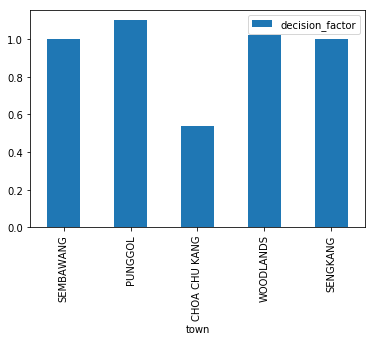

In [386]:
rent_slice_df_grouped.plot(kind='bar', x= 'town',y='decision_factor')


In [387]:
latitude, longitude = 1.35, 103.82
sg_map_winner = folium.Map(location=[latitude, longitude], zoom_start=12) # generate Singapore map
# generate choropleth map using the rental price of each town in Singapore
sg_map_winner.choropleth(
    geo_data='Singapore.geojson',
    data=rent_slice_df_grouped,
    columns=['town', 'decision_factor'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Decision index of 5 towns in Singapore'
)

# add the town center as blue circle markers
for lat, lng, label in zip(rent_slice_df_grouped.latitude, rent_slice_df_grouped.longitude, rent_slice_df_grouped.town):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sg_map_winner)


# display map
sg_map_winner